In [173]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
book = pd.read_csv('clubs_book.csv', encoding="latin-1")
users = pd.read_csv('clubs_user.csv', encoding="latin-1")
rating = pd.read_csv('ratings.csv', sep=';', encoding="latin-1")

book_old = pd.read_csv('books.csv', sep=';', encoding="latin-1")
# users_old = pd.read_csv('users.csv', sep=';', encoding="latin-1")

In [175]:
book.shape

(500, 6)

In [176]:
book.head()

,id,ISBN,title,author,publisher,publication_year
0,1,0393310779,The Greek Way,Edith Hamilton,W. W. Norton & Company,1993
1,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992
2,3,1551051729,Ghost Stories and Mysterious Creatures of Brit...,Barbara Smith,Lone Pine Publishing,1999
3,4,1402201435,The One True Ocean,Sarah Beth Martin,Sourcebooks Landmark,2003
4,5,0060926546,"Murder on a Kibbutz : Communal Case, A",Batya Gur,Perennial,1995


In [177]:
book_old.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [178]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [179]:
# users_old.head()

In [180]:
users.head()

,password,last_login,is_superuser,is_staff,is_active,date_joined,username,id,first_name,last_name,age,email,bio,country
0,Password123,NaN,0,0,1,2022-02-18,@SylviaMiller109044,109044,Sylvia,Miller,64,Sylvia.Miller109044@example.com,Ea optio.,"oklahoma city, oklahoma, usa"
1,Password123,NaN,0,0,1,2022-02-18,@StaceyBegum185532,185532,Stacey,Begum,147,Stacey.Begum185532@example.com,Error.,"san fracisco, california, usa"
2,Password123,NaN,0,0,1,2022-02-18,@DorothyStone145929,145929,Dorothy,Stone,105,Dorothy.Stone145929@example.com,Inventore.,"bad homburg, hessen, germany"
3,Password123,NaN,0,0,1,2022-02-18,@EdwardBradley170814,170814,Edward,Bradley,42,Edward.Bradley170814@example.com,Aliquam.,"messina, sicilia, italy"
4,Password123,NaN,0,0,1,2022-02-18,@JanetSmart104159,104159,Janet,Smart,22,Janet.Smart104159@example.com,Suscipit.,"forest lake, minnesota, usa"


In [181]:
# merge datasets
df_merged_book_rating = book.merge(rating, how="left", on="ISBN")
df_merged = df_merged_book_rating.merge(users, how="left", on="id")

In [182]:
df_merged.head()


,id,ISBN,title,author,publisher,publication_year,User-ID,Book-Rating,password,last_login,...,is_staff,is_active,date_joined,username,first_name,last_name,age,email,bio,country
0,1,0393310779,The Greek Way,Edith Hamilton,W. W. Norton & Company,1993,184279,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,3167,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,11676,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,31826,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,46398,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
df_merged_book_rating.head()

,id,ISBN,title,author,publisher,publication_year,User-ID,Book-Rating
0,1,0393310779,The Greek Way,Edith Hamilton,W. W. Norton & Company,1993,184279,0
1,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,3167,8
2,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,11676,7
3,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,31826,10
4,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,46398,0


## cleaning the data

In [184]:
df_merged.head()

,id,ISBN,title,author,publisher,publication_year,User-ID,Book-Rating,password,last_login,...,is_staff,is_active,date_joined,username,first_name,last_name,age,email,bio,country
0,1,0393310779,The Greek Way,Edith Hamilton,W. W. Norton & Company,1993,184279,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,3167,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,11676,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,31826,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,46398,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
# removing nan's
# df_merged.dropna(how = 'any', inplace=True)

In [186]:
# drop duplicates
# df_merged.drop_duplicates(subset=None, keep='first', inplace=True)

In [187]:
# regex-based replacement of certain characters
df_merged['author'] = df_merged['author'].str.replace(r'[^\w\s]+', '')

/tmp/ipykernel_134339/757090585.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_merged['author'] = df_merged['author'].str.replace(r'[^\w\s]+', '')


In [188]:
# only use books that are published between 1950 to 2016
df_merged = df_merged[(df_merged['publication_year'] > 1950) & (df_merged['publication_year'] <= 2016)]

In [189]:
# removing unwanted columns
df_merged.drop(columns=["password", "last_login", "is_staff", "is_active", 
    "date_joined", "is_superuser", "username", "first_name", "last_name", "age", "email", "bio", "country"], inplace=True)

In [190]:
df_merged.head()

,id,ISBN,title,author,publisher,publication_year,User-ID,Book-Rating
0,1,0393310779,The Greek Way,Edith Hamilton,W. W. Norton & Company,1993,184279,0
1,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,3167,8
2,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,11676,7
3,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,31826,10
4,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,46398,0


In [191]:
df_merged.shape

(1488, 8)

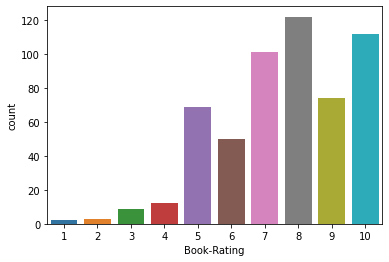

In [192]:
# removing 0-rating and plotting the distribution without '0'

df_merged = df_merged[df_merged['Book-Rating']!=0] 
sns.countplot(x=df_merged['Book-Rating'],data=df_merged)
plt.show()

In [193]:
df_merged.groupby(['Book-Rating']).count() / len(df_merged) * 100 

,id,ISBN,title,author,publisher,publication_year,User-ID
Book-Rating,,,,,,,
1,0.361011,0.361011,0.361011,0.361011,0.361011,0.361011,0.361011
2,0.541516,0.541516,0.541516,0.541516,0.541516,0.541516,0.541516
3,1.624549,1.624549,1.624549,1.624549,1.624549,1.624549,1.624549
4,2.166065,2.166065,2.166065,2.166065,2.166065,2.166065,2.166065
5,12.454874,12.454874,12.454874,12.454874,12.454874,12.454874,12.454874
6,9.025271,9.025271,9.025271,9.025271,9.025271,9.025271,9.025271
7,18.231047,18.231047,18.231047,18.231047,18.231047,18.231047,18.231047
8,22.021661,22.021661,22.021661,22.021661,22.021661,22.021661,22.021661
9,13.357401,13.357401,13.357401,13.357401,13.357401,13.357401,13.357401


In [194]:
# converting User-ID variable to int
df_merged['User-ID'] = df_merged['User-ID'].astype('int')

In [195]:
# author of The Da Vinci Code written in two different ways
df_merged["author"] = df_merged["author"].astype("string")
df_merged["author"] = df_merged["author"].str.replace("DAN BROWN","Dan Brown")

In [196]:
# author of Dreamcatcher book correcting incorrect entries
df_merged["author"] = df_merged["author"].str.replace("Audrey Osofsky","Stephen King")
df_merged["author"] = df_merged["author"].str.replace("Dinah McCall","Stephen King")

## EDA


In [197]:
df_merged.head()

,id,ISBN,title,author,publisher,publication_year,User-ID,Book-Rating
1,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,3167,8
2,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,11676,7
3,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,31826,10
6,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,98356,8
7,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,248781,8


In [198]:
# size of dataset
df_merged.shape

(554, 8)

In [199]:
df_merged[['publication_year']].describe()

,publication_year
count,554.000000
mean,1995.000000
std,6.954515
min,1963.000000
25%,1991.000000
50%,1997.000000
75%,2000.000000
max,2004.000000


In [200]:
# unique reader count
df_merged["User-ID"].nunique()

486

In [201]:
# unique number of books
df_merged["title"].nunique()

273

In [202]:
# how many books users read
df_merged.groupby('User-ID')['title'].agg('count').sort_values()

User-ID
388        1
188703     1
188171     1
188038     1
185677     1
          ..
189835     3
153662     5
197659     5
11676     14
98391     15
Name: title, Length: 486, dtype: int64

In [203]:
# how many times has each book been read
df_most_read_books = pd.DataFrame(df_merged["title"].value_counts())

In [204]:
# most read books
df_most_read_books.sort_values("title", ascending=False).head(20)

,title
Split Second (Maggie O'Dell Novels (Paperback)),19
"Chicken Soup for the Kid's Soul : 101 Stories of Courage, Hope and Laughter (Chicken Soup for the Soul (Paperback Health Communications))",14
The Conquest,14
The Hitchhiker's Guide to the Galaxy,12
Mr. X,11
Scandal,10
Little Women (Illustrated Junior Library),10
Human Stain,10
Trial by Fire,10
Along Came a Spider,10


In [205]:
# books with less than 100 reads are marked as rare books
rare_book = df_most_read_books[df_most_read_books["title"] <= 5].index

In [206]:
# number of rarely read books
rare_book.nunique() 

253

In [207]:
# by removing the rare books from the dataset, the most read books are extracted 
df_popular_books = df_merged[~df_merged["title"].isin(rare_book)]
df_popular_books.head()

,id,ISBN,title,author,publisher,publication_year,User-ID,Book-Rating
1,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,3167,8
2,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,11676,7
3,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,31826,10
6,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,98356,8
7,2,0399136487,Damia (Rowan),Anne McCaffrey,Putnam Pub Group,1992,248781,8


In [208]:
# User-Book matrix
df_user_book = df_popular_books.pivot_table(index=["User-ID"], columns=["title"], values="Book-Rating")
df_user_book

title,Along Came a Spider,Betty Crocker's New Cookbook: Everything You Need to Know to Cook (8th ed),"Chicken Soup for the Kid's Soul : 101 Stories of Courage, Hope and Laughter (Chicken Soup for the Soul (Paperback Health Communications))",Coffee Will Make You Black,Commitments (Vintage Contemporaries),Damia (Rowan),Human Stain,Little Women (Illustrated Junior Library),Mr. X,Paranoia : A Novel,Ransom (Laurel Leaf Books),Scandal,Silent Partner,Split Second (Maggie O'Dell Novels (Paperback)),The Conquest,The Hitchhiker's Guide to the Galaxy,The Pleasure of Finding Things Out: The Best Short Works of Richard P. Feynman,The Weigh Down Diet,Time Out for Mom . . . Ahhh Moments,Trial by Fire
User-ID,,,,,,,,,,,,,,,,,,,,
3167,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
8971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
10394,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
# choosing a random book
book_name = "Damia (Rowan)"

In [212]:
# ratings given to the book
book_name = df_user_book[book_name]
book_name.sort_values(ascending=False)

User-ID
31826     10.0
249894    10.0
3167       8.0
98356      8.0
248781     8.0
          ... 
271705     NaN
274301     NaN
275994     NaN
276680     NaN
278188     NaN
Name: Damia (Rowan), Length: 170, dtype: float64

In [213]:
# correlation between books based on user rating

df_user_book.corrwith(book_name).sort_values(ascending=False).head()

/home/niki/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/niki/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Damia (Rowan)                                                                                                                                1.0
Along Came a Spider                                                                                                                          NaN
Betty Crocker's New Cookbook: Everything You Need to Know to Cook (8th ed)                                                                   NaN
Chicken Soup for the Kid's Soul : 101 Stories of Courage, Hope and Laughter (Chicken Soup for the Soul (Paperback Health Communications))    NaN
Coffee Will Make You Black                                                                                                                   NaN
dtype: float64

In [214]:
# create a list with recommendations based on correlation

rec_book = df_user_book.corrwith(book_name).sort_values(ascending=False).head()
rec_book_list = list(rec_book.index)

rec_book_list

/home/niki/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/niki/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


['Damia (Rowan)',
 'Along Came a Spider',
 "Betty Crocker's New Cookbook: Everything You Need to Know to Cook (8th ed)",
 "Chicken Soup for the Kid's Soul : 101 Stories of Courage, Hope and Laughter (Chicken Soup for the Soul (Paperback Health Communications))",
 'Coffee Will Make You Black']

In [215]:
# authors of 5 books we recommend

df_author = df_merged[["title","author"]]
df_author.head()

df1 = df_author.loc[df_author["title"].isin(rec_book_list)]

df2 = df1.drop_duplicates(subset=["author","author"], keep="first")
df2 

,title,author
1,Damia (Rowan),Anne McCaffrey
450,Betty Crocker's New Cookbook: Everything You N...,Betty Crocker
703,Chicken Soup for the Kid's Soul : 101 Stories ...,Jack Canfield
981,Along Came a Spider,James Patterson
1174,Coffee Will Make You Black,April Sinclair


In [216]:
df2.shape

(5, 2)